# Download de bibliotecas, Upload de dataset and configuração do pandas

In [2]:
# baixando as bibliotecas necessárias
!pip3 install scikit-learn
!pip3 install matplotlib
!pip3 install seaborn
!pip3 install pandas
!pip3 install datetime
!pip3 install joblib

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.metrics import r2_score
from datetime import date, datetime
from sklearn.model_selection import cross_val_score
import joblib

In [4]:
# configurando o pandas para mostrar todas as colunas
pd.set_option('display.max_columns', None)

In [5]:
# pegando o dataset e subindo no notebook
df = pd.read_csv('Global YouTube Statistics.csv', encoding='unicode_escape')

In [6]:
# entendendo as colunas e qual o tipo delas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

In [7]:
# verificando a quantidade de dados NaN
df.isnull().sum()

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
created_month                                5
created_date 

# Pre-processamento

In [8]:
# # Transformando os dados de data em datetime e depois usando a diferença entre a data de criação e o dia de hoje
# df['created_month'] = df['created_month'].replace({'Jan':1,
#                                                   'Feb':2,
#                                                   'Mar':3,
#                                                   'Apr':4,
#                                                   'May':5,
#                                                   'Jun':6,
#                                                   'Jul':7,
#                                                   'Aug':8,
#                                                   'Sep':9,
#                                                   'Oct':10,
#                                                   'Nov':11,
#                                                   'Dec':12})
# df = df.sort_values(by=['created_year','created_month','created_date'])

# df['created_year'] = df['created_year'].fillna(method='ffill')
# df['created_month'] = df['created_month'].fillna(method='ffill')
# df['created_date'] = df['created_date'].fillna(method='ffill')

# year = df['created_year']
# month = df['created_month']
# date = df['created_date']

# lista = list()
# dici = dict()
# for i,j,k in zip(date,month,year):
#   dia = pd.to_datetime(f'{int(i)}/{int(j)}/{int(k)}', format='%d/%m/%Y')
#   dici['creation'] = int((datetime.now() - dia).days)
#   lista.append(dici.copy())

# data = pd.DataFrame(lista)

# # join do dataframe de data feito
# df = df.join(data)

In [9]:
# removendo as colunas de data nao mais necessárias de data
df = df.drop(columns={'created_year','created_month','created_date'})

In [10]:
# Substituindo valores incoerentes(como uploads em zero ou lucro = 0, mesmo não sendo um canal Nonprofit) e aplicando valores médios(mediana) no lugar de NaN
df['uploads'] = df['uploads'].replace({0:df['uploads'].median()})

colunas_incoerentes = ['lowest_monthly_earnings','highest_monthly_earnings','lowest_yearly_earnings','highest_yearly_earnings','video_views_for_the_last_30_days','subscribers_for_last_30_days']
for i in colunas_incoerentes:
  df[i] = df[i].loc[(df['channel_type'] != 'Nonprofit')].replace({0:df[i].median()})
  df[i] = df[i].fillna(df[i].median())


In [11]:
# Substituindo dados NaN categóricos por valores médios(moda)
df['Country'] = df['Country'].fillna(df['Country'].mode()[0])
df['channel_type'] = df['channel_type'].fillna(df['channel_type'].mode()[0])
df

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,1.0,1.0,1.0,2.258000e+09,564600.0,9000000.00,6800000.00,1.084000e+08,2000000.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,4055159.0,7670.0,7423.0,1.200000e+01,13300.0,0.05,0.04,5.800000e-01,200000.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,48.0,1.0,1.0,1.348000e+09,337000.0,5400000.00,4000000.00,6.470000e+07,8000000.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,2.0,2.0,1.0,1.975000e+09,493800.0,7900000.00,5900000.00,9.480000e+07,1000000.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,3.0,2.0,2.0,1.824000e+09,455900.0,7300000.00,5500000.00,8.750000e+07,1000000.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,Natan por Aï¿,12300000,9.029610e+09,Sports,Natan por Aï¿,1200,Brazil,BR,Entertainment,525.0,55.0,172.0,5.525130e+08,138100.0,2200000.00,1700000.00,2.650000e+07,700000.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
991,992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500,India,IN,Games,6141.0,125.0,69.0,6.473500e+07,16200.0,258900.00,194200.00,3.100000e+06,300000.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
992,993,Panda,12300000,2.214684e+09,NaN,HybridPanda,2452,United Kingdom,GB,Games,129005.0,867.0,1202.0,6.703500e+04,17.0,268.00,201.00,3.200000e+03,1000.0,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973
993,994,RobTopGames,12300000,3.741235e+08,Gaming,RobTopGames,39,Sweden,SE,Games,35112.0,4.0,69.0,3.871000e+06,968.0,15500.00,11600.00,1.858000e+05,100000.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501


# Data exploration

In [12]:
# verificando a quantidade de dados NaN
df.isnull().sum()

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                      0
Abbreviation                               122
channel_type                                 0
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days             0
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days                 0
Gross tertiary education enrollment (%)    123
Population                                 123
Unemployment 

C:\Users\55119\AppData\Local\Temp\ipykernel_21676\3822932293.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


<Figure size 640x480 with 0 Axes>

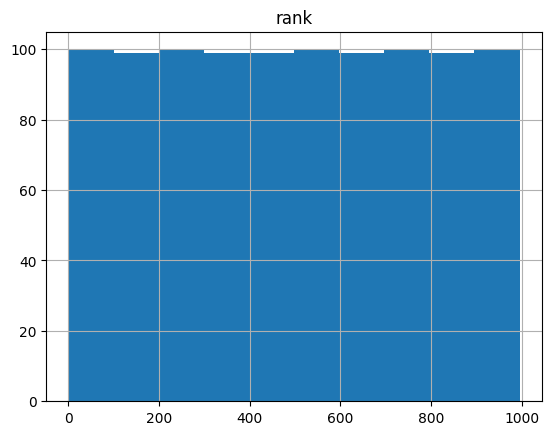

<Figure size 640x480 with 0 Axes>

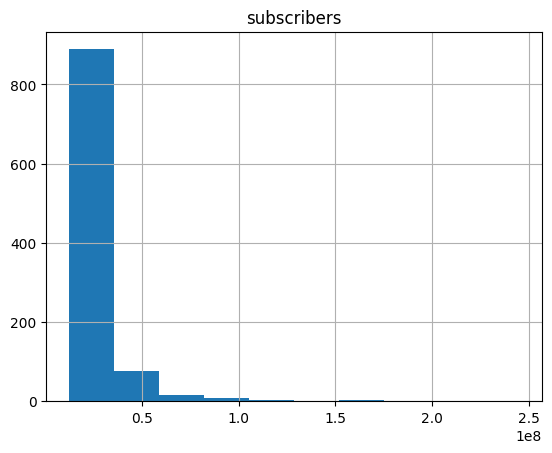

<Figure size 640x480 with 0 Axes>

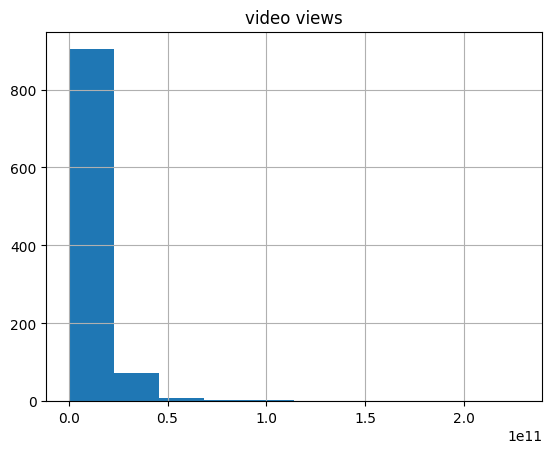

<Figure size 640x480 with 0 Axes>

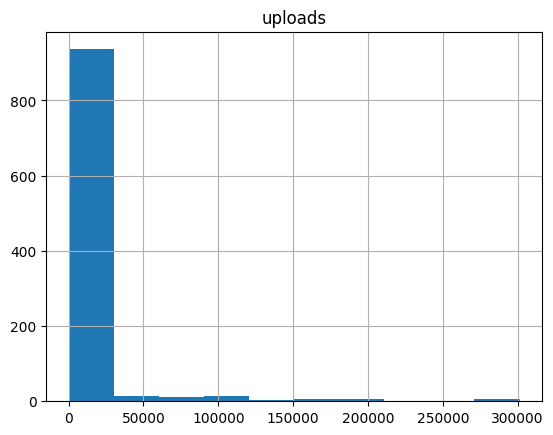

<Figure size 640x480 with 0 Axes>

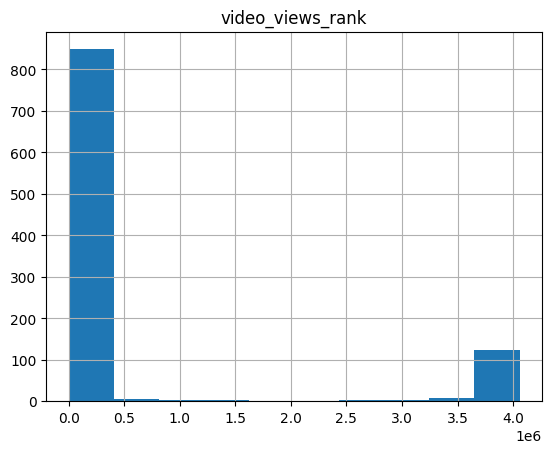

<Figure size 640x480 with 0 Axes>

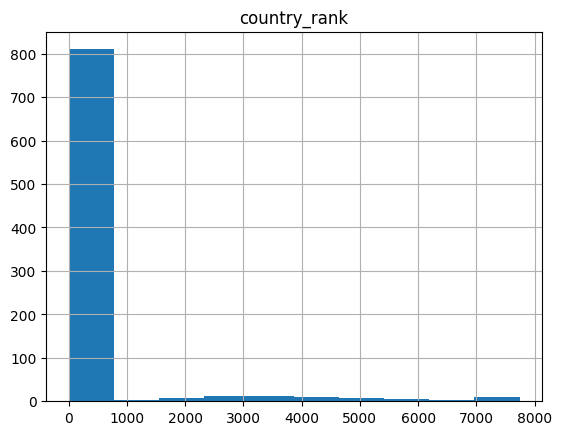

<Figure size 640x480 with 0 Axes>

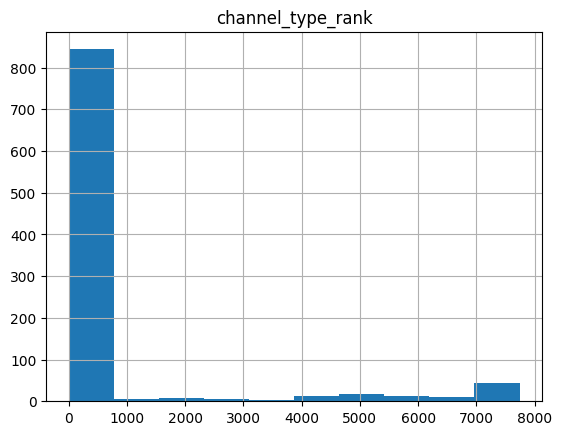

<Figure size 640x480 with 0 Axes>

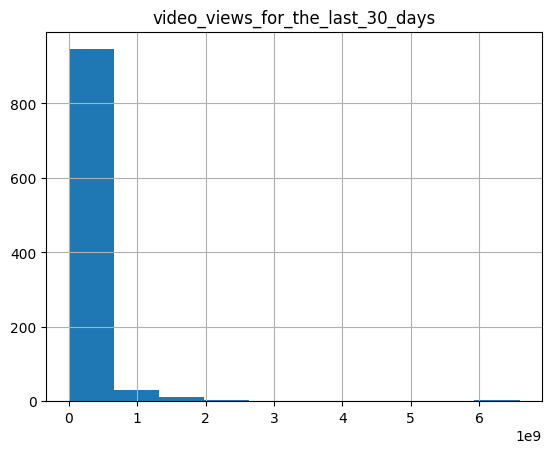

<Figure size 640x480 with 0 Axes>

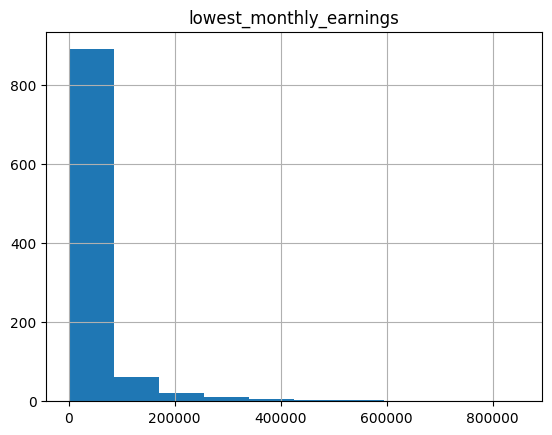

<Figure size 640x480 with 0 Axes>

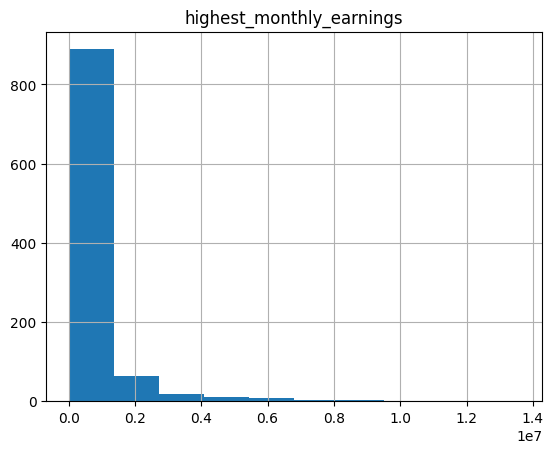

<Figure size 640x480 with 0 Axes>

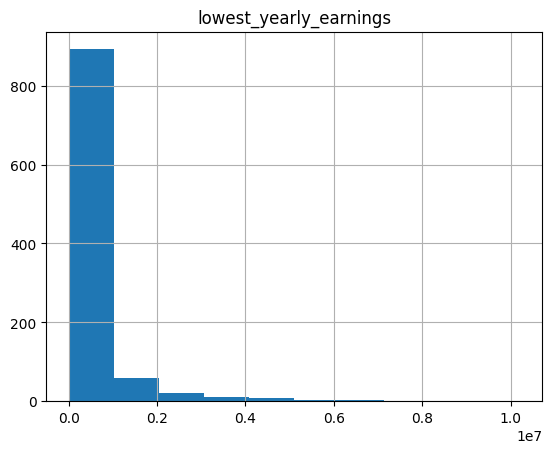

<Figure size 640x480 with 0 Axes>

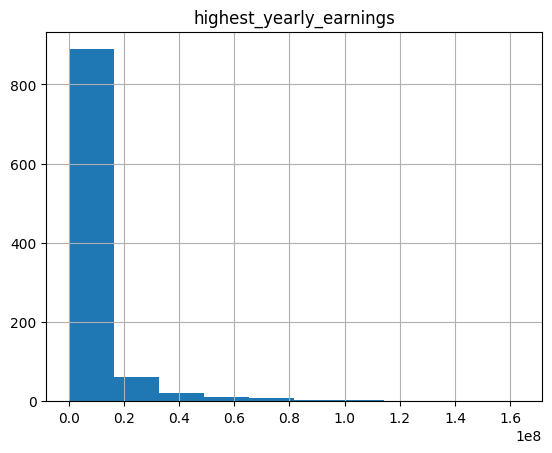

<Figure size 640x480 with 0 Axes>

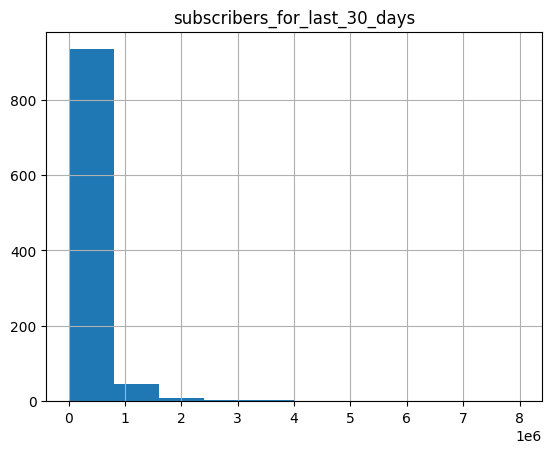

<Figure size 640x480 with 0 Axes>

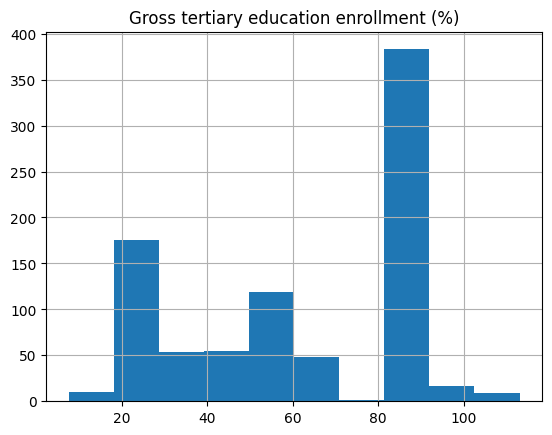

<Figure size 640x480 with 0 Axes>

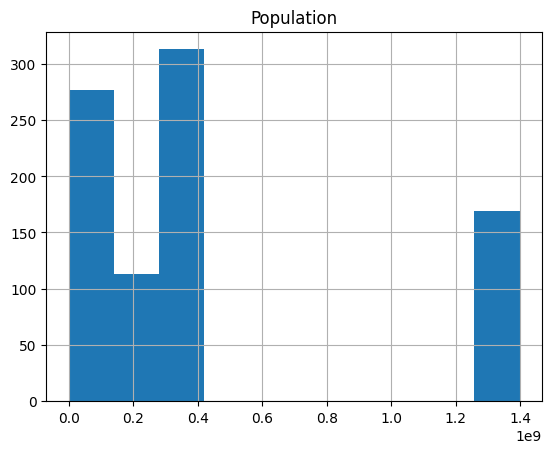

<Figure size 640x480 with 0 Axes>

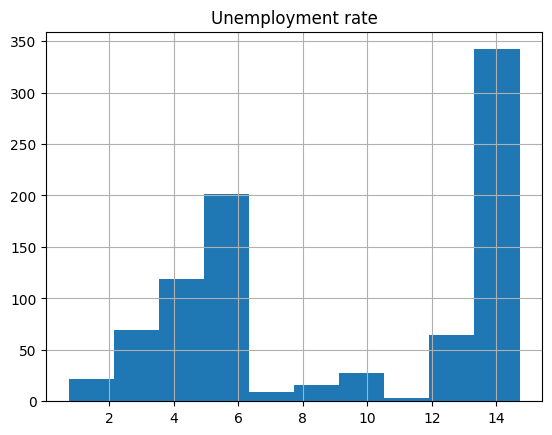

<Figure size 640x480 with 0 Axes>

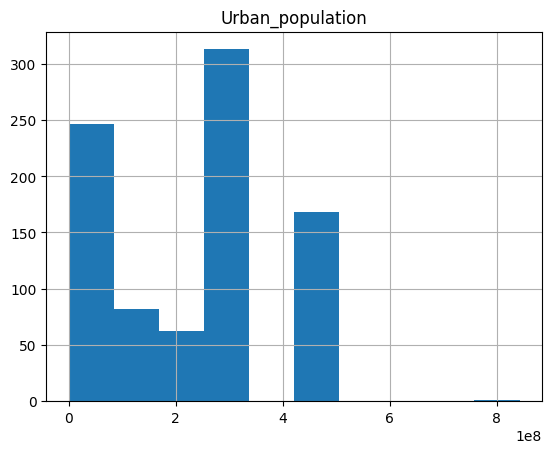

<Figure size 640x480 with 0 Axes>

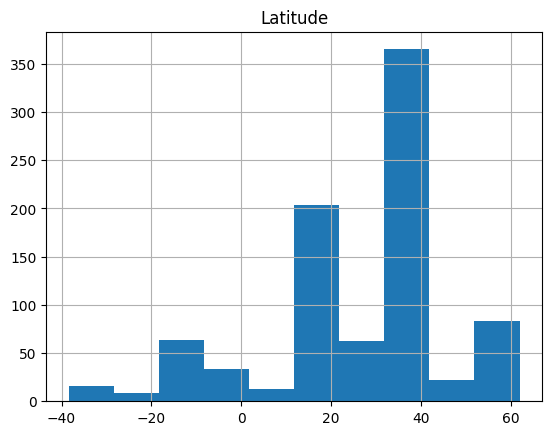

<Figure size 640x480 with 0 Axes>

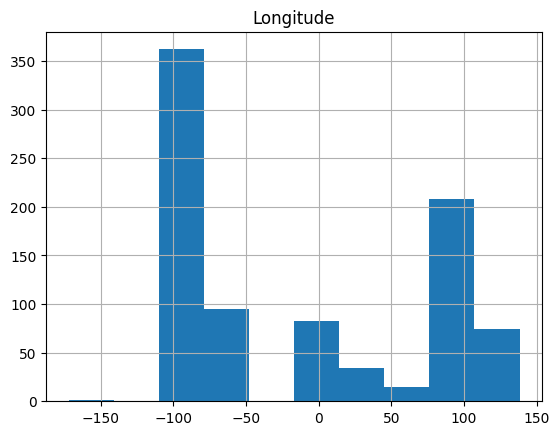

In [13]:
# entendendo a distribuição dos dados
columns_numeric = df.select_dtypes(include=['int64', 'float64']).columns.to_list()

for column in columns_numeric:
    plt.figure()
    df.hist([column])

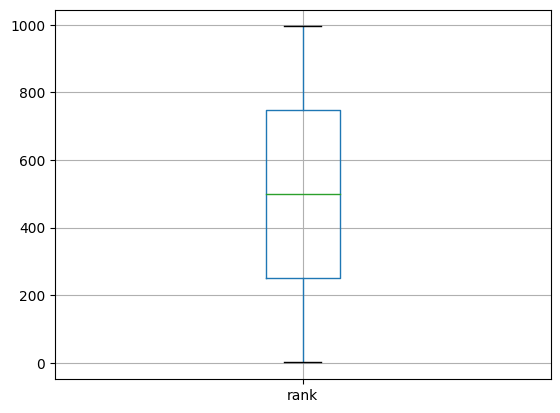

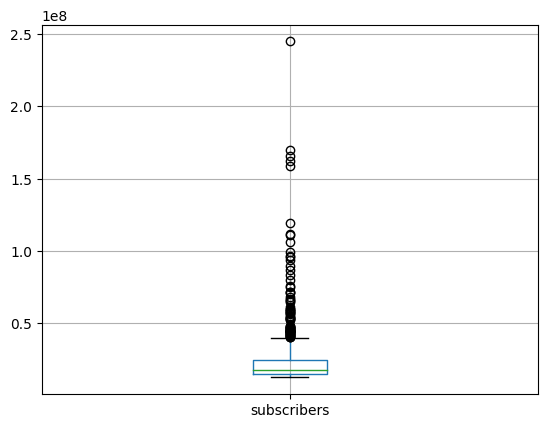

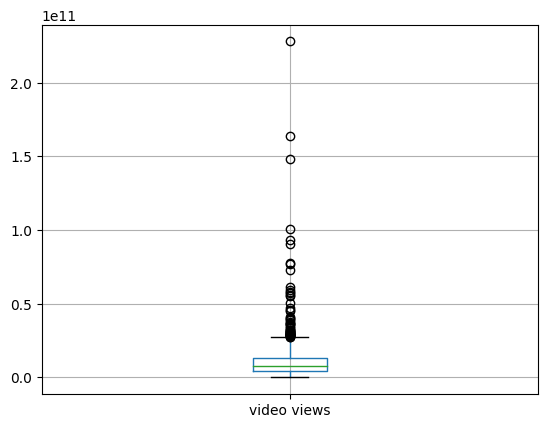

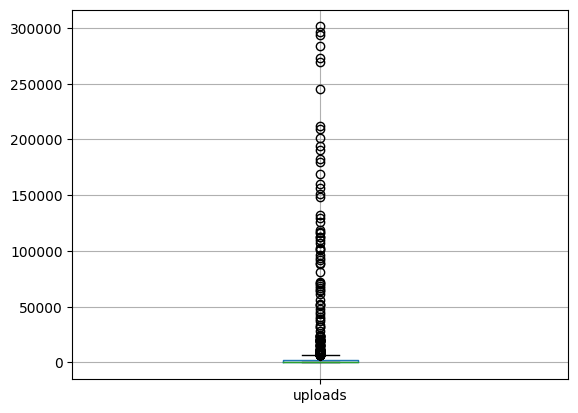

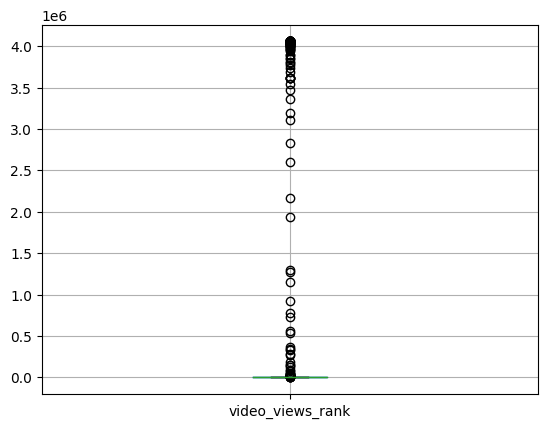

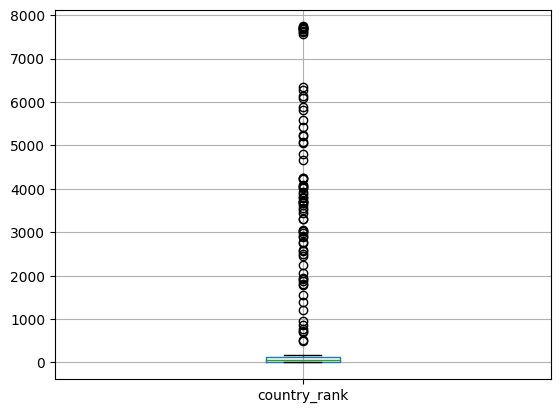

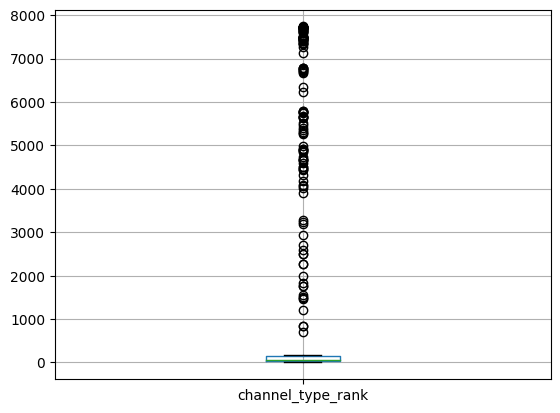

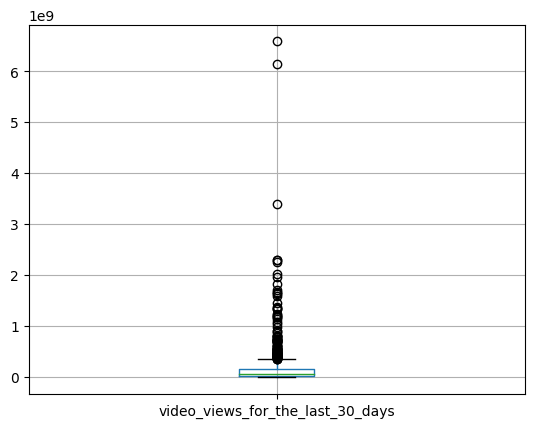

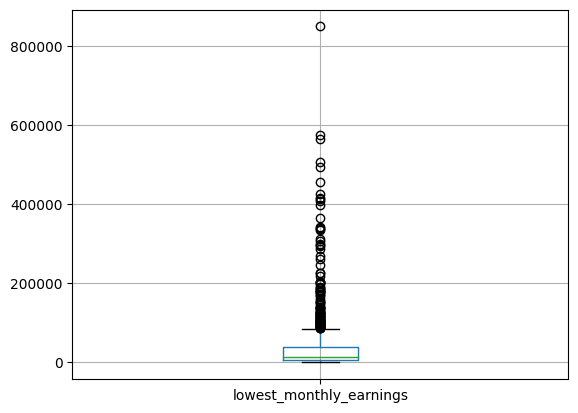

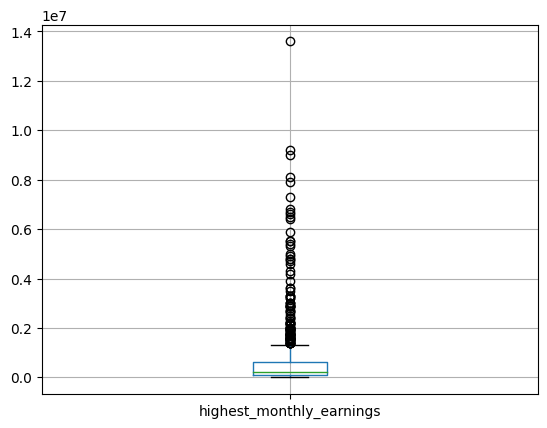

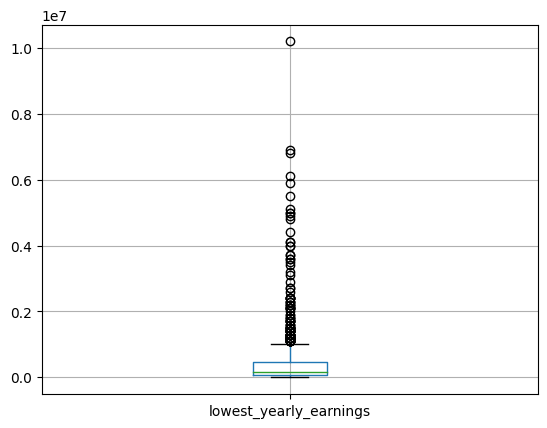

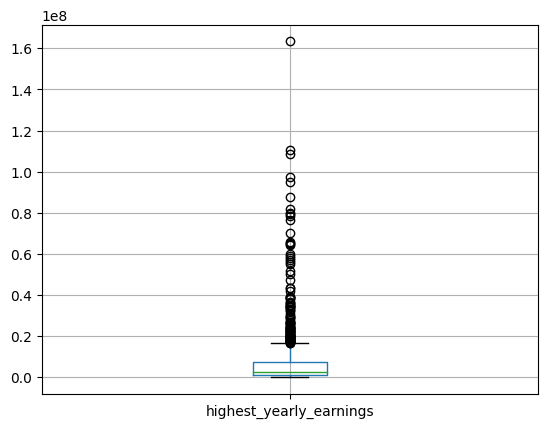

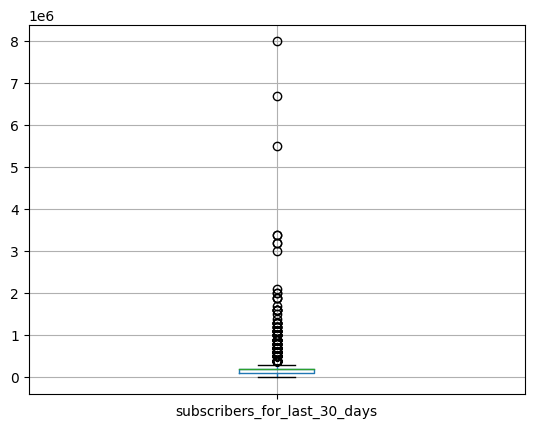

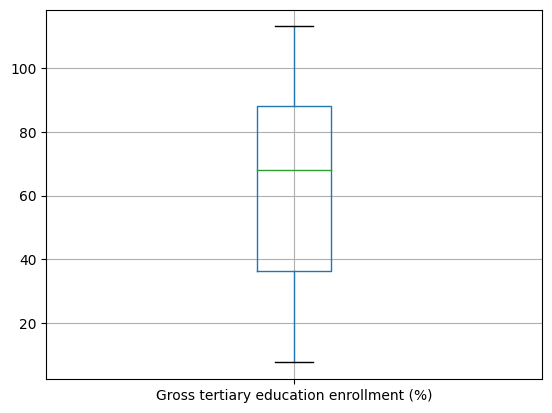

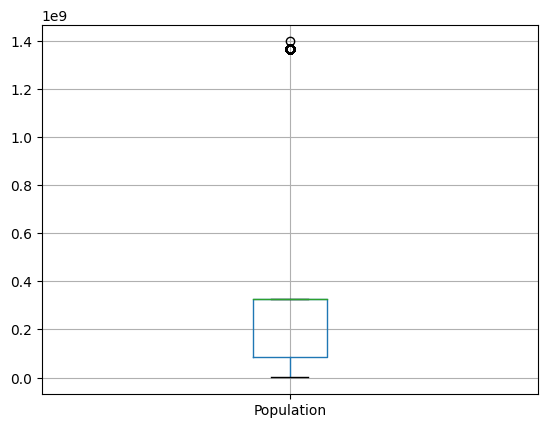

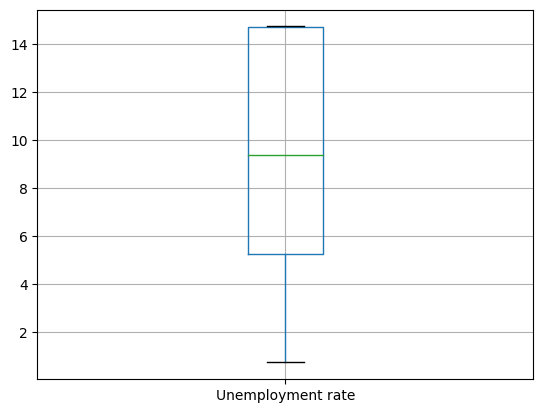

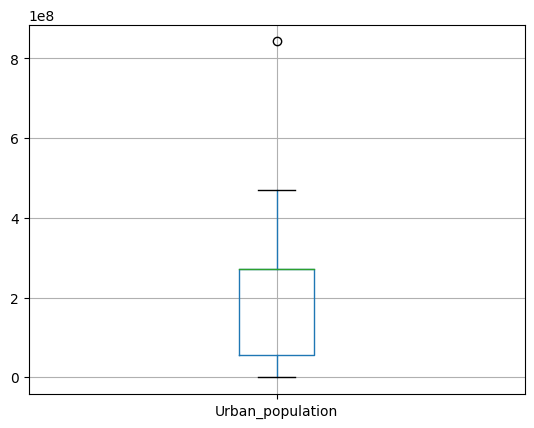

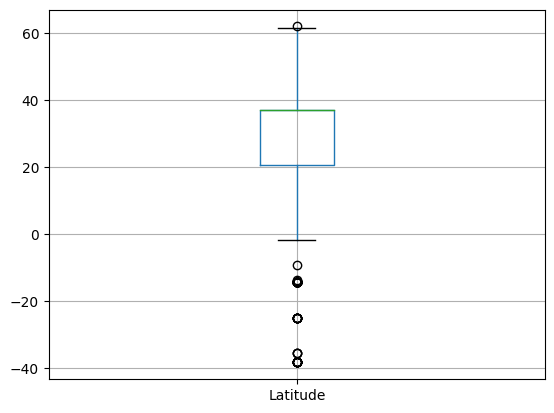

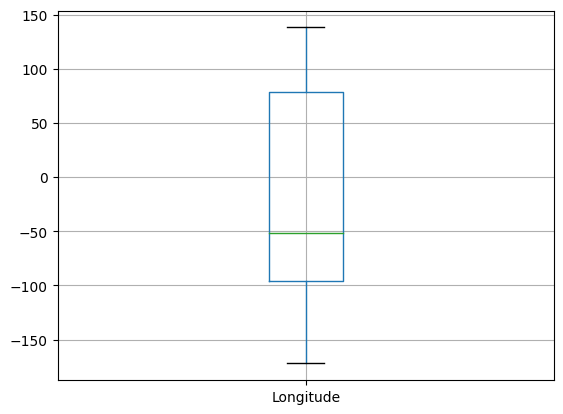

In [14]:
# procurando outliers
columns_numeric = df.select_dtypes(include=['int64', 'float64']).columns.to_list()

for column in columns_numeric:
    plt.figure()
    df.boxplot([column])

# Feature Engineering

## Matriz de correlação

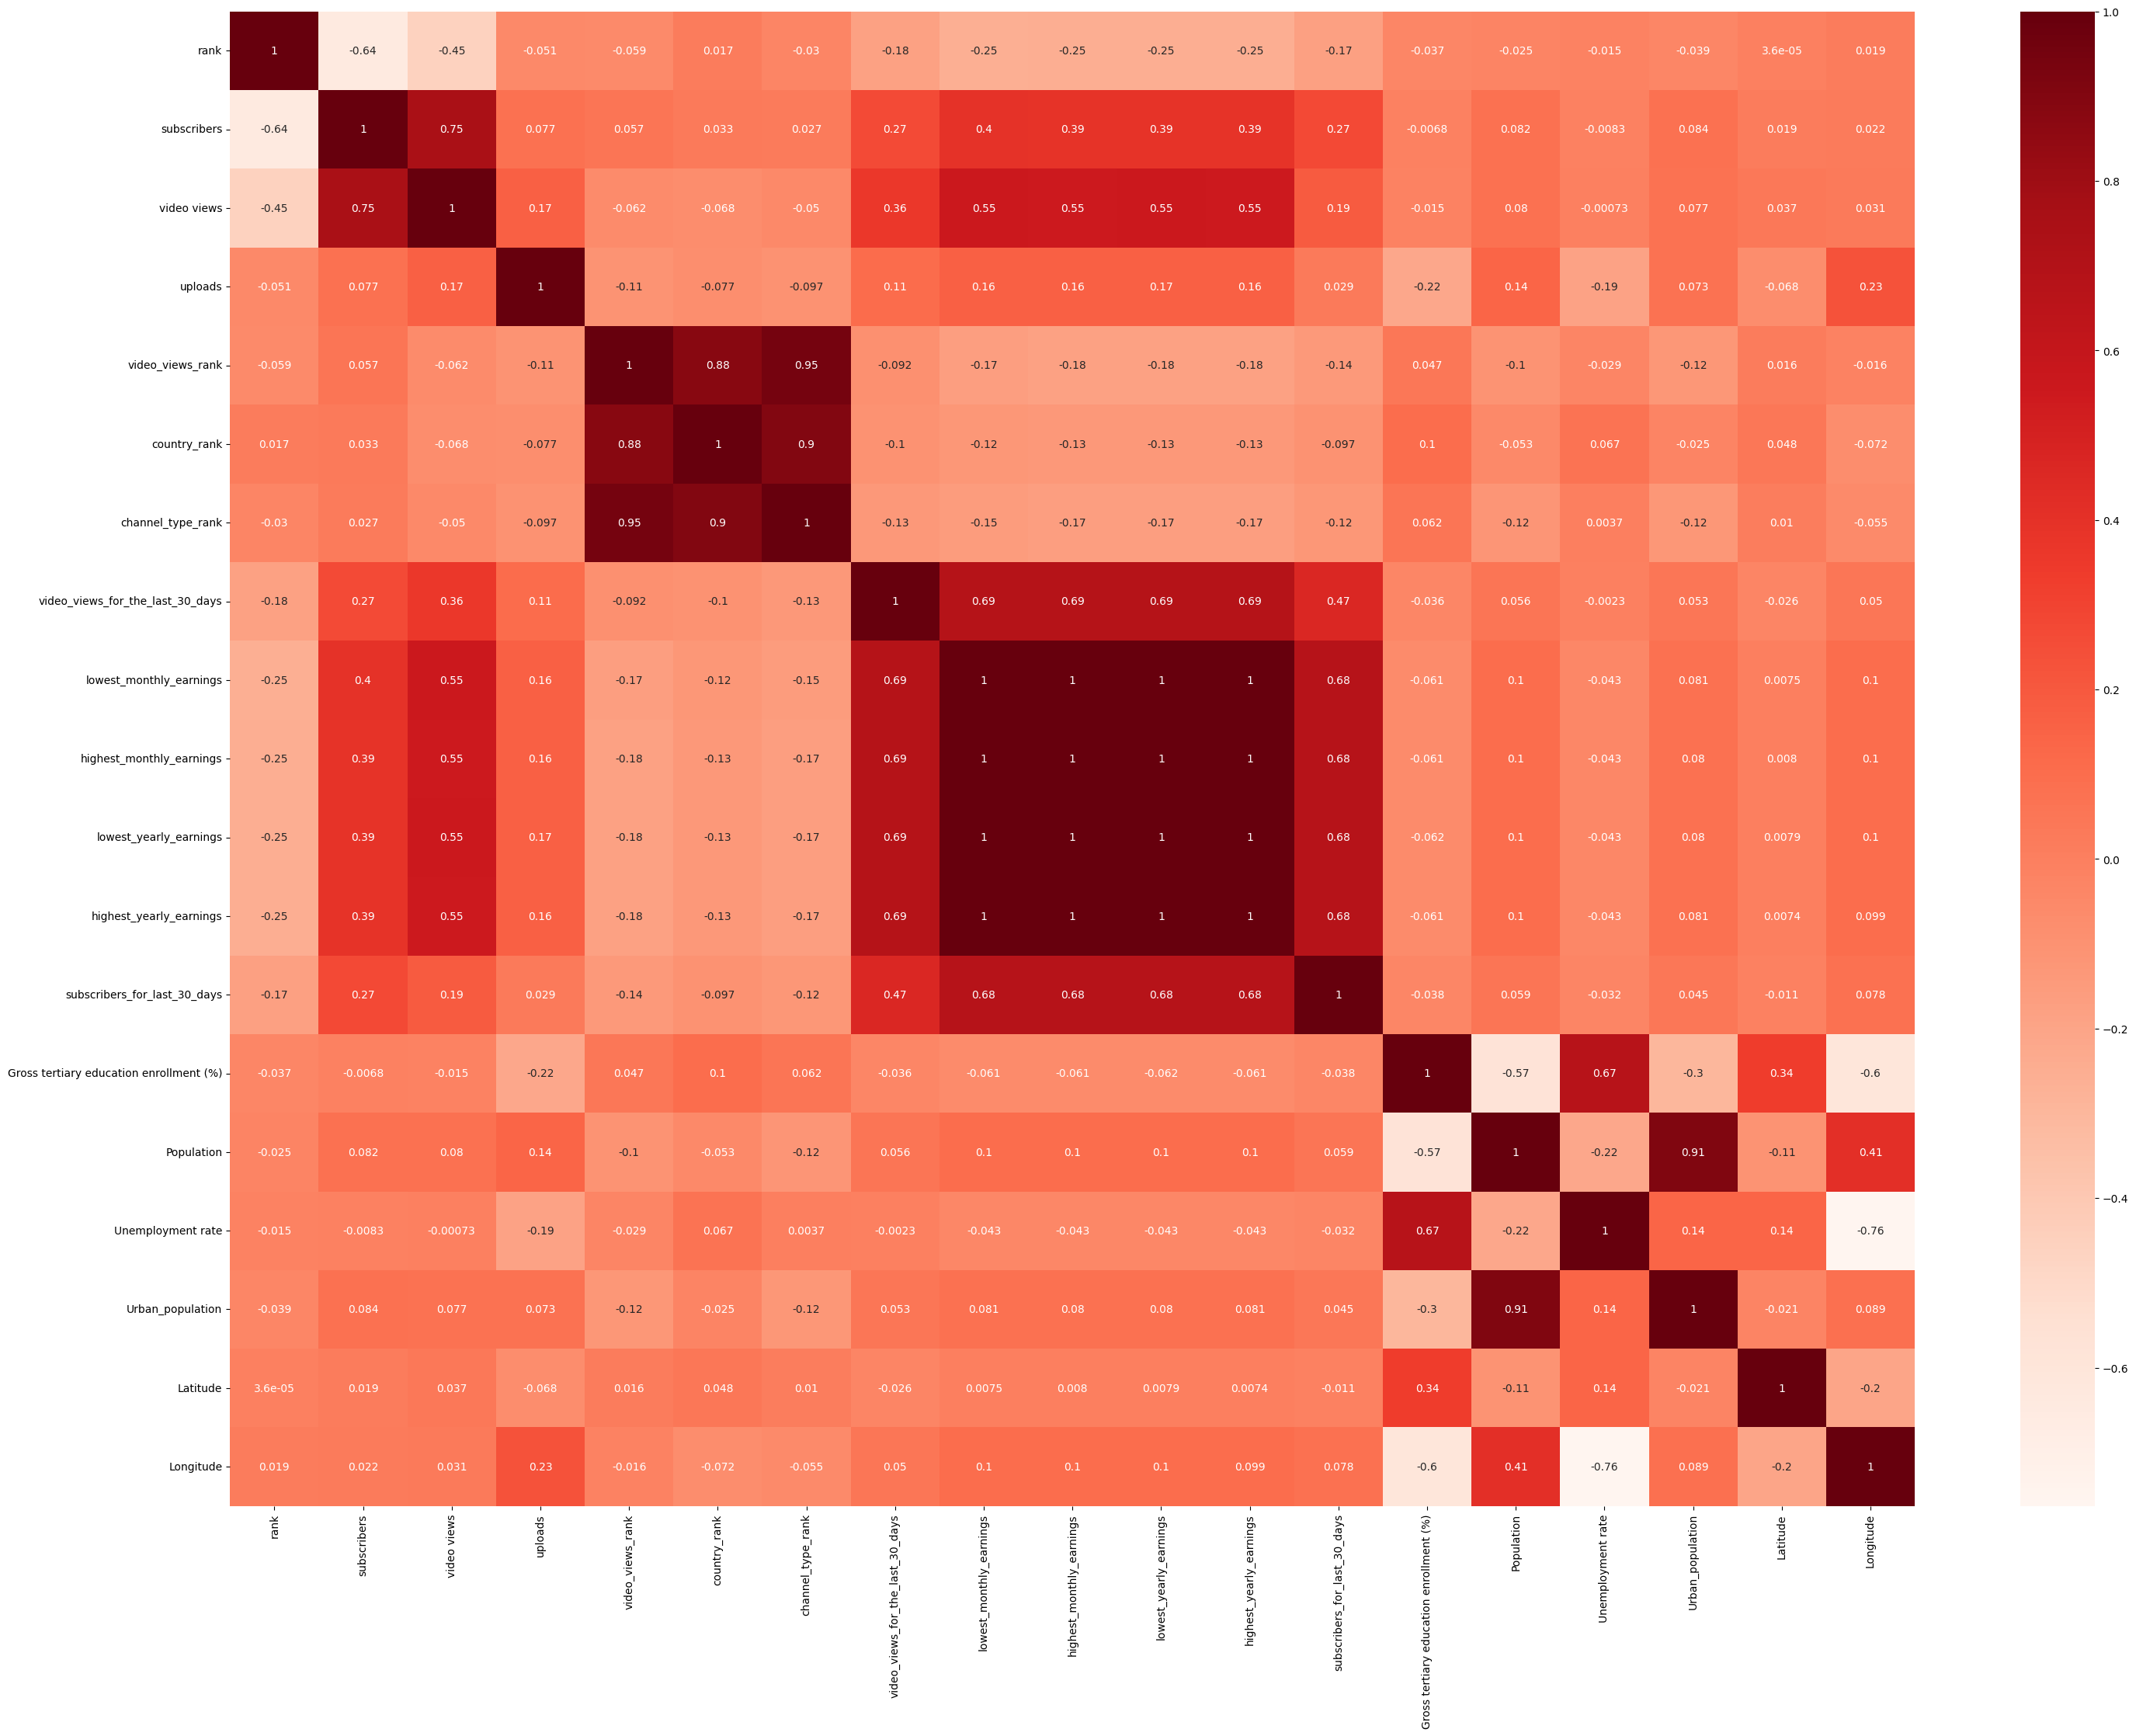

In [15]:
# verificando correlação entre colunas numericas
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.to_list()


plt.figure(figsize=(35,25))
cor = df[numeric_cols].corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

obs: há alta correlação entre algumas das colunas, impossibitando de usar todas no modelo. Para solucionar isso deve-se selecionar **uma** para entrar como feature no modelo

In [16]:
# dropando colunas com alta correlação
pre_modelo = df.drop(columns={'country_rank','channel_type_rank','highest_monthly_earnings','lowest_monthly_earnings','lowest_yearly_earnings','highest_yearly_earnings','subscribers_for_last_30_days'})

## Provando correlação entre Colunas com variáveis categóricas(país) e numéricas(população, população urbana, taxa de desemprego, latitude, longitude, taxa de alunos no ensino superior)

In [17]:
df.groupby('Country')['Latitude'].unique()

Country
Afghanistan                  [33.93911]
Andorra                           [nan]
Argentina                  [-38.416097]
Australia                  [-25.274398]
Bangladesh                  [23.684994]
Barbados                    [13.193887]
Brazil                     [-14.235004]
Canada                      [56.130366]
Chile                      [-35.675147]
China                        [35.86166]
Colombia                     [4.570868]
Cuba                        [21.521757]
Ecuador                     [-1.831239]
Egypt                       [26.820553]
El Salvador                 [13.794185]
Finland                      [61.92411]
France                      [46.227638]
Germany                     [51.165691]
India                       [20.593684]
Indonesia                   [-0.789275]
Iraq                        [33.223191]
Italy                        [41.87194]
Japan                       [36.204824]
Jordan                      [30.585164]
Kuwait                       [29

In [18]:
df.groupby('Country')['Longitude'].unique()

Country
Afghanistan                   [67.709953]
Andorra                             [nan]
Argentina                    [-63.616672]
Australia                    [133.775136]
Bangladesh                    [90.356331]
Barbados                     [-59.543198]
Brazil                        [-51.92528]
Canada                      [-106.346771]
Chile                        [-71.542969]
China                        [104.195397]
Colombia                     [-74.297333]
Cuba                         [-77.781167]
Ecuador                      [-78.183406]
Egypt                         [30.802498]
El Salvador                   [-88.89653]
Finland                       [25.748151]
France                         [2.213749]
Germany                       [10.451526]
India                          [78.96288]
Indonesia                    [113.921327]
Iraq                          [43.679291]
Italy                          [12.56738]
Japan                        [138.252924]
Jordan                    

In [19]:
df.groupby('Country')['Gross tertiary education enrollment (%)'].unique()

Country
Afghanistan                   [9.7]
Andorra                       [nan]
Argentina                    [90.0]
Australia                   [113.1]
Bangladesh                   [20.6]
Barbados                     [65.4]
Brazil                       [51.3]
Canada                       [68.9]
Chile                        [88.5]
China                        [50.6]
Colombia                     [55.3]
Cuba                         [41.4]
Ecuador                      [44.9]
Egypt                        [35.2]
El Salvador                  [29.4]
Finland                      [88.2]
France                       [65.6]
Germany                      [70.2]
India                        [28.1]
Indonesia                    [36.3]
Iraq                         [16.2]
Italy                        [61.9]
Japan                        [63.2]
Jordan                       [34.4]
Kuwait                       [54.4]
Latvia                       [88.1]
Malaysia                     [45.1]
Mexico              

In [20]:
df.groupby('Country')['Unemployment rate'].unique()

Country
Afghanistan                 [11.12]
Andorra                       [nan]
Argentina                    [9.79]
Australia                    [5.27]
Bangladesh                   [4.19]
Barbados                    [10.33]
Brazil                      [12.08]
Canada                       [5.56]
Chile                        [7.09]
China                        [4.32]
Colombia                     [9.71]
Cuba                         [1.64]
Ecuador                      [3.97]
Egypt                       [10.76]
El Salvador                  [4.11]
Finland                      [6.59]
France                       [8.43]
Germany                      [3.04]
India                        [5.36]
Indonesia                    [4.69]
Iraq                        [12.82]
Italy                        [9.89]
Japan                        [2.29]
Jordan                      [14.72]
Kuwait                       [2.18]
Latvia                       [6.52]
Malaysia                     [3.32]
Mexico              

In [21]:
df.groupby('Country')['Urban_population'].unique()

Country
Afghanistan                    [9797273.0]
Andorra                              [nan]
Argentina                     [41339571.0]
Australia                     [21844756.0]
Bangladesh                    [60987417.0]
Barbados                         [89431.0]
Brazil                       [183241641.0]
Canada                        [30628482.0]
Chile                         [16610135.0]
China                        [842933962.0]
Colombia                      [40827302.0]
Cuba                           [8739135.0]
Ecuador                       [11116711.0]
Egypt                         [42895824.0]
El Salvador                    [4694702.0]
Finland                        [4716888.0]
France                        [54123364.0]
Germany                       [64324835.0]
India                        [471031528.0]
Indonesia                    [151509724.0]
Iraq                          [27783368.0]
Italy                         [42651966.0]
Japan                        [115782416.0]
Jor

In [22]:
df.groupby('Country')['Population'].unique()

Country
Afghanistan                   [38041754.0]
Andorra                              [nan]
Argentina                     [44938712.0]
Australia                     [25766605.0]
Bangladesh                   [167310838.0]
Barbados                        [287025.0]
Brazil                       [212559417.0]
Canada                        [36991981.0]
Chile                         [18952038.0]
China                       [1397715000.0]
Colombia                      [50339443.0]
Cuba                          [11333483.0]
Ecuador                       [17373662.0]
Egypt                        [100388073.0]
El Salvador                    [6453553.0]
Finland                        [5520314.0]
France                        [67059887.0]
Germany                       [83132799.0]
India                       [1366417754.0]
Indonesia                    [270203917.0]
Iraq                          [39309783.0]
Italy                         [60297396.0]
Japan                        [126226568.0]
Jor

In [23]:
# drop de colunas desnecessárias
modelo = pre_modelo.drop(columns={'Youtuber','Longitude','Latitude','Population','Unemployment rate','Urban_population','Gross tertiary education enrollment (%)','Title','Abbreviation','category','uploads','video_views_rank'})

# Modelagem

## Perfil dos dados selecionados para o modelo

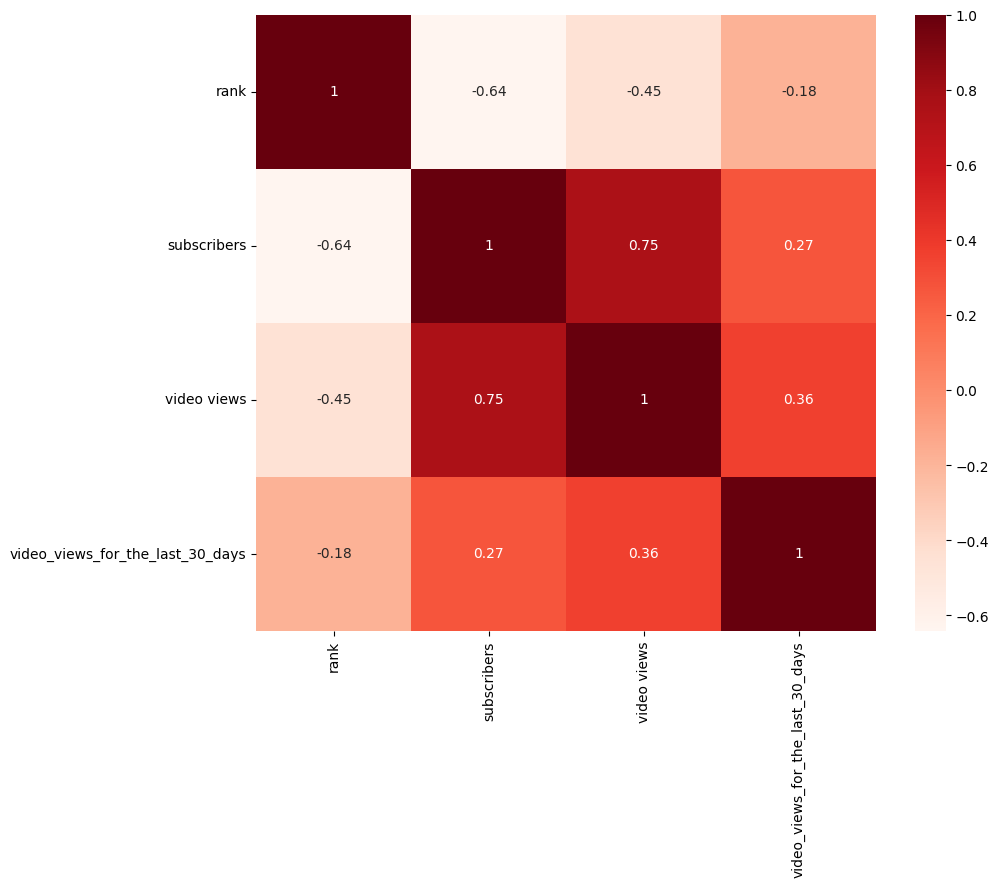

In [24]:
# verificando correlação entre colunas numericas
numeric_cols = modelo.select_dtypes(include=['int64', 'float64']).columns.to_list()


plt.figure(figsize=(10,8))
cor = modelo[numeric_cols].corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

<Figure size 640x480 with 0 Axes>

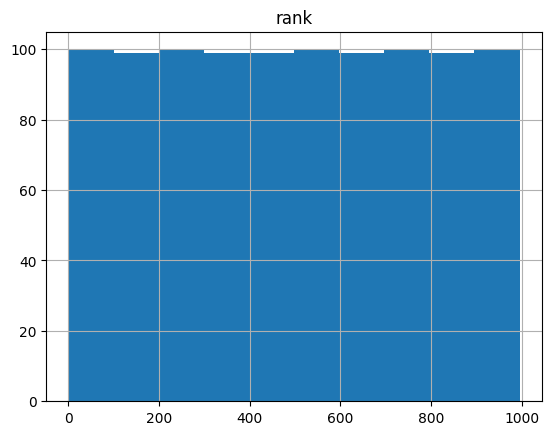

<Figure size 640x480 with 0 Axes>

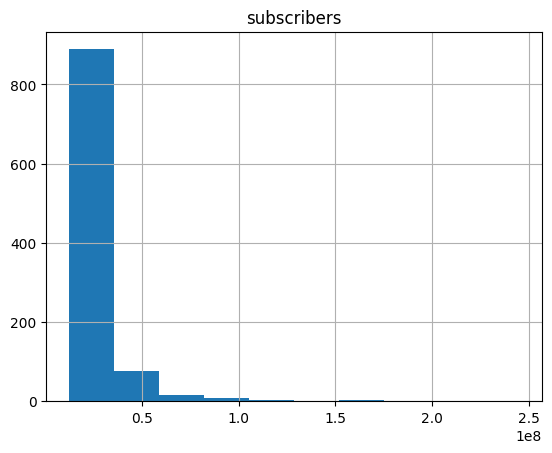

<Figure size 640x480 with 0 Axes>

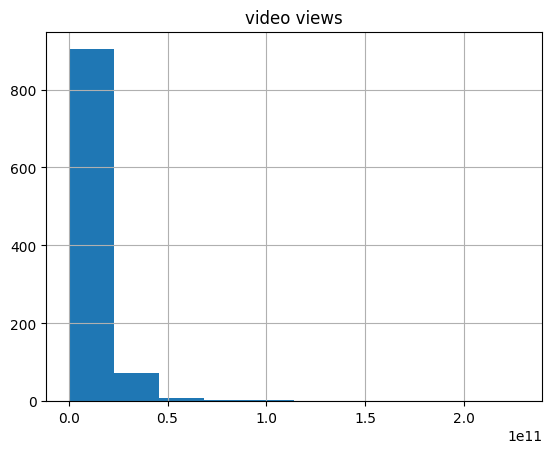

<Figure size 640x480 with 0 Axes>

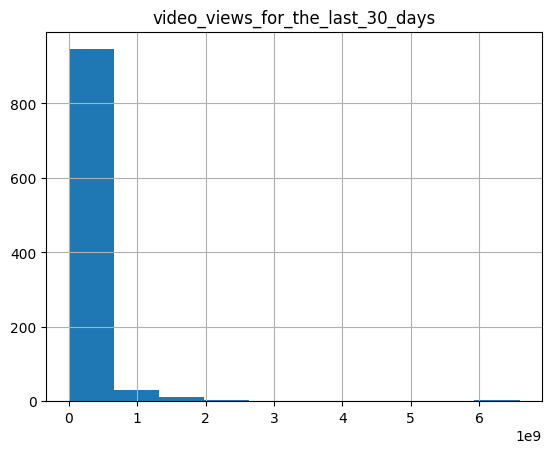

In [25]:
# entendendo a distribuição dos dados
columns_numeric = modelo.select_dtypes(include=['int64', 'float64']).columns.to_list()
for column in columns_numeric:
    plt.figure()
    modelo.hist([column])

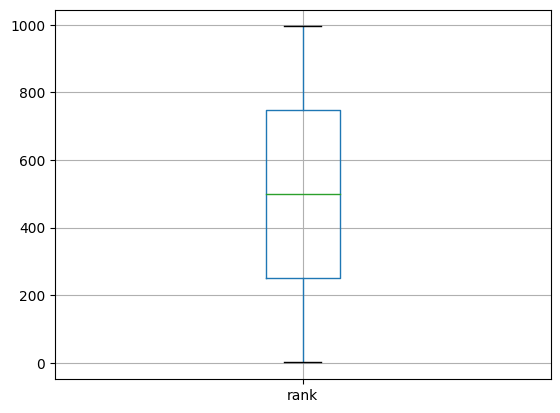

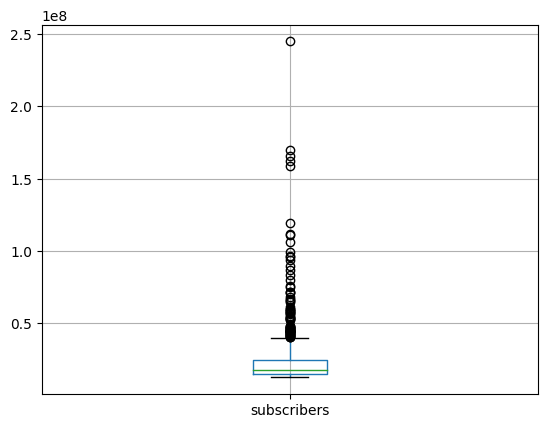

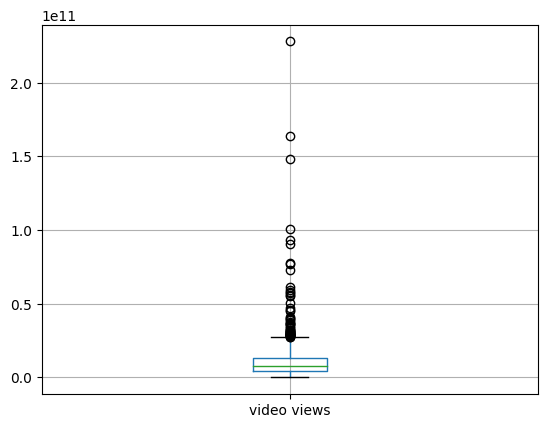

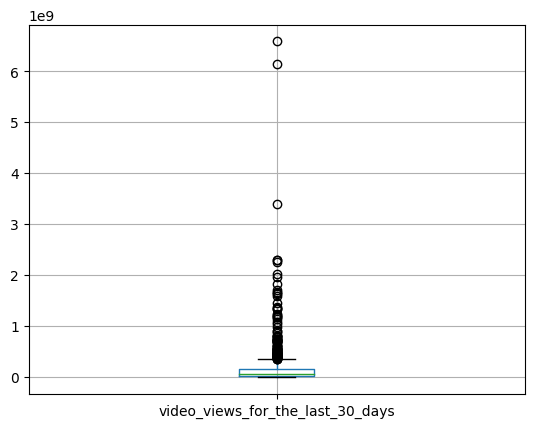

In [26]:
# verificando outliers
columns_numeric = modelo.select_dtypes(include=['int64', 'float64']).columns.to_list()

for column in columns_numeric:
    plt.figure()
    modelo.boxplot([column])

## Modelo

In [27]:
# aplicando one-hot enconding
pais = pd.get_dummies(modelo.Country)
cat = pd.get_dummies(modelo.channel_type)
join_all = modelo.join([pais,cat])
join_all = join_all.drop(columns={'Country','channel_type'})

In [28]:
join_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 67 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   rank                              995 non-null    int64  
 1   subscribers                       995 non-null    int64  
 2   video views                       995 non-null    float64
 3   video_views_for_the_last_30_days  995 non-null    float64
 4   Afghanistan                       995 non-null    bool   
 5   Andorra                           995 non-null    bool   
 6   Argentina                         995 non-null    bool   
 7   Australia                         995 non-null    bool   
 8   Bangladesh                        995 non-null    bool   
 9   Barbados                          995 non-null    bool   
 10  Brazil                            995 non-null    bool   
 11  Canada                            995 non-null    bool   
 12  Chile   

In [29]:
# Isolation Forest para achar outliers
model=IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.05),max_features=1.0)
model.fit(join_all)

IsolationForest(contamination=0.05, n_estimators=50)

In [30]:
# marcando os outliers
join_all['anomaly']=model.predict(join_all)
outliers = join_all['anomaly'].loc[join_all['anomaly'] == -1]
outliers

0     -1
3     -1
4     -1
8     -1
29    -1
33    -1
46    -1
56    -1
63    -1
65    -1
71    -1
73    -1
76    -1
83    -1
85    -1
120   -1
142   -1
197   -1
224   -1
243   -1
247   -1
277   -1
280   -1
301   -1
332   -1
434   -1
441   -1
455   -1
495   -1
506   -1
522   -1
554   -1
600   -1
603   -1
605   -1
628   -1
632   -1
637   -1
707   -1
741   -1
775   -1
790   -1
797   -1
817   -1
818   -1
922   -1
932   -1
953   -1
974   -1
992   -1
Name: anomaly, dtype: int32

In [31]:
# removendo os outliers com threshold de 5%
join_all = join_all.drop(columns={'anomaly'})
join_all.drop(outliers.index)


,rank,subscribers,video views,video_views_for_the_last_30_days,Afghanistan,Andorra,Argentina,Australia,Bangladesh,Barbados,Brazil,Canada,Chile,China,Colombia,Cuba,Ecuador,Egypt,El Salvador,Finland,France,Germany,India,Indonesia,Iraq,Italy,Japan,Jordan,Kuwait,Latvia,Malaysia,Mexico,Morocco,Netherlands,Pakistan,Peru,Philippines,Russia,Samoa,Saudi Arabia,Singapore,South Korea,Spain,Sweden,Switzerland,Thailand,Turkey,Ukraine,United Arab Emirates,United Kingdom,United States,Venezuela,Vietnam,Animals,Autos,Comedy,Education,Entertainment,Film,Games,Howto,Music,News,Nonprofit,People,Sports,Tech
1,2,170000000,0.000000e+00,1.200000e+01,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
2,3,166000000,2.836884e+10,1.348000e+09,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
5,6,119000000,0.000000e+00,6.408500e+07,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
6,7,112000000,9.324704e+10,7.316740e+08,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
7,8,111000000,2.905804e+10,3.918400e+07,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,990,12400000,6.993406e+09,4.941200e+07,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
990,991,12300000,9.029610e+09,5.525130e+08,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
991,992,12300000,1.674410e+09,6.473500e+07,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False

In [32]:
join_all.columns

Index(['rank', 'subscribers', 'video views',
       'video_views_for_the_last_30_days', 'Afghanistan', 'Andorra',
       'Argentina', 'Australia', 'Bangladesh', 'Barbados', 'Brazil', 'Canada',
       'Chile', 'China', 'Colombia', 'Cuba', 'Ecuador', 'Egypt', 'El Salvador',
       'Finland', 'France', 'Germany', 'India', 'Indonesia', 'Iraq', 'Italy',
       'Japan', 'Jordan', 'Kuwait', 'Latvia', 'Malaysia', 'Mexico', 'Morocco',
       'Netherlands', 'Pakistan', 'Peru', 'Philippines', 'Russia', 'Samoa',
       'Saudi Arabia', 'Singapore', 'South Korea', 'Spain', 'Sweden',
       'Switzerland', 'Thailand', 'Turkey', 'Ukraine', 'United Arab Emirates',
       'United Kingdom', 'United States', 'Venezuela', 'Vietnam', 'Animals',
       'Autos', 'Comedy', 'Education', 'Entertainment', 'Film', 'Games',
       'Howto', 'Music', 'News', 'Nonprofit', 'People', 'Sports', 'Tech'],
      dtype='object')

In [33]:
# divide a coluna target das features
y = join_all['rank']
x = join_all.drop(columns={y.name})

In [34]:
x.columns

Index(['subscribers', 'video views', 'video_views_for_the_last_30_days',
       'Afghanistan', 'Andorra', 'Argentina', 'Australia', 'Bangladesh',
       'Barbados', 'Brazil', 'Canada', 'Chile', 'China', 'Colombia', 'Cuba',
       'Ecuador', 'Egypt', 'El Salvador', 'Finland', 'France', 'Germany',
       'India', 'Indonesia', 'Iraq', 'Italy', 'Japan', 'Jordan', 'Kuwait',
       'Latvia', 'Malaysia', 'Mexico', 'Morocco', 'Netherlands', 'Pakistan',
       'Peru', 'Philippines', 'Russia', 'Samoa', 'Saudi Arabia', 'Singapore',
       'South Korea', 'Spain', 'Sweden', 'Switzerland', 'Thailand', 'Turkey',
       'Ukraine', 'United Arab Emirates', 'United Kingdom', 'United States',
       'Venezuela', 'Vietnam', 'Animals', 'Autos', 'Comedy', 'Education',
       'Entertainment', 'Film', 'Games', 'Howto', 'Music', 'News', 'Nonprofit',
       'People', 'Sports', 'Tech'],
      dtype='object')

In [35]:
# separa em treino e teste
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [36]:
# treinando o modelo
clf = linear_model.Lasso(alpha=0.1)
clf.fit(X_train, y_train)

Lasso(alpha=0.1)

In [37]:
# teste de cross validation para ver se está com overfitting
scores = cross_val_score(clf, x, y, cv=5)
scores

array([-1106.74145411,   -18.86523942,    -2.16570556,    -7.9011854 ,
         -48.71192287])

se tá consistente tá beleza

In [ ]:
# faz a predição
y_pred = clf.predict(X_test)

In [ ]:
# teste de r2 para testar a acurácia
r2 = r2_score(y_test, y_pred)
r2

0.9586958501772109

In [ ]:
# sobe o modelo para os arquivos
joblib.dump(clf, 'modelo.pkl')

['modelo.pkl']

In [ ]:
# Prepara uma entrada para predição
data = pd.DataFrame([['10000000', '6275', '10000000', '5000000','United States','Games']])
data.columns = ['video_views_for_the_last_30_days','creation','subscribers','video views','Country','channel_type']
data[data['Country']] = 1
data[data['channel_type']] = 1

In [ ]:
# Criação dos dataframe com os outros dados do one hot encoding
columns = list(set(join_all.columns) - set(data.columns))
zero_array = []
for i in range(len(columns)):
  zero_array.append(0)
data2 = pd.DataFrame([zero_array])
data2.columns = columns

# Join dos dois dataframes
data_prediction = data.join(data2)

# tirando o y e colunas do one-hot
columns_to_drop = ['Country','channel_type','rank']
data_prediction = data_prediction.drop(columns=columns_to_drop)
data_prediction = data_prediction[x.columns]


In [ ]:
data_prediction

,subscribers,video views,video_views_for_the_last_30_days,creation,Afghanistan,Andorra,Argentina,Australia,Bangladesh,Barbados,Brazil,Canada,Chile,China,Colombia,Cuba,Ecuador,Egypt,El Salvador,Finland,France,Germany,India,Indonesia,Iraq,Italy,Japan,Jordan,Kuwait,Latvia,Malaysia,Mexico,Morocco,Netherlands,Pakistan,Peru,Philippines,Russia,Samoa,Saudi Arabia,Singapore,South Korea,Spain,Sweden,Switzerland,Thailand,Turkey,Ukraine,United Arab Emirates,United Kingdom,United States,Venezuela,Vietnam,Animals,Autos,Comedy,Education,Entertainment,Film,Games,Howto,Music,News,Nonprofit,People,Sports,Tech
0,10000000,5000000,10000000,6275,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
if clf.predict(data_prediction) < 1:
    prediction = 1
else:
    prediction = clf.predict(data_prediction)
prediction

array([21.20626837])